## Scikit-Learn é uma biblioteca que auxilia na validação do modelo.

A separação de dados em treino e teste é muito importante para ter-se condições de avaliar o desempenho de um modelo em dados que ainda não foram vistos. Na verdade, dados ainda não vistos são o foco de aprendizado de máquina, visto que ao desenvolver-se sistemas, o principal objetivo é colocá-los em produção e ter performance aceitável (confiável).

Existe uma subdivisão dos dados de treino que pode ser o conjunto de validação. O conjunto de validação pode, por exemplo, participar de um processo de melhoria do modelo. Uma vez que o modelo está aperfeiçoado suficiente, então ele é avaliado no conjunto de teste.

Vamos explorar um conjunto de dados diferentes: uma base de vinhos; separar os dados e verificar como a mudança de parâmetros afeta o resultado. Há uma forma automatizada de fazer isso, mas isso será conteúdo do próximo encontro. Por enquanto, vamos fazer tudo manualmente para entender o processo.

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

data = cancer.data
target = cancer.target

In [5]:
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [231]:
# separando os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, shuffle = True, random_state=142)

# separando o conjunto de treino em validação também
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, shuffle = True, random_state=142)

Agora, os dados estão divididos em três blocos disjuntos: treino, validação e teste. 
* O teste representa aproximadamente 33% da quantidade dados;
* A validação representa aproximadamente 22% (66% x 33%) do total de dados; e
* O treino representa aproximadamente 44% da quantidade de dados originais;

A seguir, será comparado o desempenho do KNN treinado com o conjunto de treino e testado no conjunto de validação.

In [232]:
# treinando o modelo 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# avaliando o modelo
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_val)
accuracy_score(y_val, y_pred)

0.9366197183098591

O resultado mostra a princípio como a redução na quantidade de dados de treino impacta o desempenho do método. Esse conjunto de validação é bastante importante para servir como um tipo de teste e analisar a relação de melhoria ou piora com a mudança de parâmetros no método de aprendizagem.

Vamos supor testes com diferentes valores de *k* (n_neighbors) no método k-NN. Vamos mostrar o desempenho a cada mudança de parâmetro, e também vamos salvar o modelo sempre que um resultado maior for obtido.

In [96]:
best_model = None
best_accuracy = 0

for k in [1,2,3,4,5]:

    knn = KNeighborsClassifier(n_neighbors = k) # a cada passo, o parâmetro assume um valor
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print('K:', k, '- ACC:', acc)
    
    if acc > best_accuracy:
        best_model = knn
        best_accuracy = acc
        
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print()
print('Melhor modelo:')
print('K:', best_model.get_params()['n_neighbors'], '- ACC:', acc * 100) #corrigir

K: 1 - ACC: 0.8873239436619719
K: 2 - ACC: 0.8873239436619719
K: 3 - ACC: 0.9366197183098591
K: 4 - ACC: 0.9295774647887324
K: 5 - ACC: 0.9366197183098591

Melhor modelo:
K: 3 - ACC: 93.6842105263158


No trecho de código anterior, foi avaliado o desempenho do método de aprendizagem usando 5 parametrizações diferentes: k = 1, 2, 3, 4 e 5. Em vez de fazer essa verificação diretamente no conjunto de teste, essa verificação deve ser feita no conjunto de validação quando houver dados suficiente. No exemplo anterior, o melhor resultado foi obtido com k = 1. Assim, o modelo salvo como *melhor modelo* foi k = 1, e foi esse modelo o escolhido para ser utilizado na verificação de performance com o conjunto de teste.

Agora que o conjunto de teste está totalmente isolado e não é usado para definir melhores parâmetros, é importante se atentar para outra questão: suponha que, por acaso, as amostras mais fáceis tenham caído no conjunto de teste. Isso vai influenciar o resultado positivamente, gerando uma falsa impressão de que o método de aprendizagem trouxe bons resultados. Aqui duas saídas são possíveis: embaralhar os dados e rodar o mesmo experimento várias vezes ou utilizar validação cruzada.

**Os experimentos feitos até aqui usaram a estratégia de validação hold-out**, onde uma parcela dos dados é isolada e utilizada para verificar o desempenho do modelo. Na primeira proposta para contornar o problema de amostras muito fáceis caírem no conjunto de teste, sugeriu-se usar várias vezes o hold-out com embaralhamento das amostras. Embora aplicável, estatisticamente existe um grau de cetismo da viabilidade disso. Isso porque não há garantias de que todas as amostras em algum momento estarão no conjunto de teste. *A solução de garantia é a validação cruzada ou cross-validation.*

In [107]:
# embaralhando os dados várias vezes e re-executando o experimento
import numpy as np
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # 5 execuções diferentes com 20% dos dados para teste

acc = []
for train_index, test_index in ss.split(data):
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(data[train_index],target[train_index])
    y_pred = knn.predict(data[test_index])
    acc.append(accuracy_score(y_pred,target[test_index]))

acc = np.asarray(acc) # converte pra numpy pra ficar mais simples de usar média e desvio padrão
print(acc)
print('Acurácia - %.2f +- %.2f' % (acc.mean() * 100, acc.std() * 100))

[0.9122807  0.92982456 0.89473684 0.90350877 0.9122807 ]
Acurácia - 91.05 +- 1.16


Aqui é importante perceber a diferença da acurácia entre essa validação (repetindo 5 vezes o experimento) e o bloco de código anterior. Na situação anterior, o modelo de k-NN com k = 1 chegou próximo a 78% de acurácia, enquanto que ao repetir o experimento, a média foi 71,11% com desvio de 8.89%, que é bastante coisa. **Pode-se dizer que é mais confiável afirmar que esse modelo tem acurácia em torno de 71% do que 78%.**

A validação cruzada pode ser feita de várias formas no Scikit-Learn, mas é importante observar que agora não temos mais apenas um resultado para o desempenho do modelo. Teremos um resultado para cada execução, então é necessário olhar para essas informações pela perspectiva da média e desvio padrão. As funções do Scikit-Learn que auxiliarão na validação cruzada são: *KFold* e *cross_val_score*.

In [108]:
# utilizando validação cruzada com cross_val_score
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 1)
scores = cross_val_score(knn, data, target, cv=5) # 5 execuções diferentes com 20% dos dados para teste

print('Acurácia - %.2f +- %.2f' % (scores.mean() * 100, scores.std() * 100))

Acurácia - 90.51 +- 2.38


In [115]:
# utilizando validação cruzada com KFold
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)

acc = []
for train_index, test_index in kf.split(data):
    knn = KNeighborsClassifier(n_neighbors = 7)
    knn.fit(data[train_index],target[train_index])
    y_pred = knn.predict(data[test_index])
    acc.append(accuracy_score(y_pred,target[test_index]))

acc = np.asarray(acc) # converte pra numpy pra ficar mais simples de usar média e desvio padrão
print(acc)
print('Acurácia - %.2f +- %.2f' % (acc.mean() * 100, acc.std() * 100))

[0.84210526 0.92982456 0.96491228 0.94736842 0.92920354]
Acurácia - 92.27 +- 4.24


Os dois blocos de cima demonstram duas maneiras de aplicar a validação cruzada a um modelo. Enquanto o primeiro afirma que a acurácia do modelo é em torno de 72%, o segundo alega 63% com desvio de 23% (que é muito alto). O primeiro tem o objetivo de avaliar o desempenho baseado em uma métrica, enquanto o segundo oferece quais os índices (linhas) que participarão de cada rodada ou execução, dando maior flexibilidade para o programador.

**Mas por que uma diferença tão grande?** A resposta é um conceito do campo de estatística: estratificação. Ter um conjunto estratificado significa que ele é representativo. Ou seja, se sua amostra tem 30 amostras da classe positiva e 30 da classe negativa, ao separar em um conjunto menor, é esperado que mantenha-se essa proporção (50/50). Enquanto que o cross_val_score faz a divisão considerando a estratificação, o KFold não o faz. Para isso, existe uma variante dessa função chamada StratifiedKFold. 

In [236]:
# utilizando validação cruzada com KFold
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = 2)

acc = []
for train_index, test_index in kf.split(data, target): # precisa passar as classes agora para que a divisão aconteça
    knn = KNeighborsClassifier(n_neighbors = 7)
    knn.fit(data[train_index],target[train_index])
    y_pred = knn.predict(data[test_index])
    acc.append(accuracy_score(y_pred,target[test_index]))

acc = np.asarray(acc) # converte pra numpy pra ficar mais simples de usar média e desvio padrão
print('Acurácia - %.2f +- %.2f' % (acc.mean() * 100, acc.std() * 100))

Acurácia - 92.09 +- 1.57


Para esse método de aprendizagem, o conjunto de dados wine parece ser mais difícil de classificar. Diferente da Iris, que ficava em torno de 98%, esse conjunto dificilmente passou dos 80%.
Vamos aplicar a visualização desses dados para verificar se eles são muito aglomerados ou linearmente separáveis.

Text(0.5, 1.0, 'PCA')

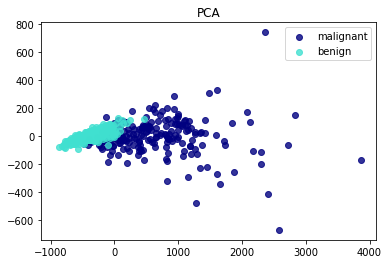

In [142]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_r = pca.fit_transform(data)

colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], cancer.target_names):
    plt.scatter(X_r[target == i, 0], X_r[target == i, 1], color=color, alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')

Os dados estão bastante aglomerados em algumas regiões, dificultando o funcionamento de métodos de aprendizagem baseados em distância e funções lineares. Os dados naturalmente têm essa característica, mas é sempre importante verificar se essa aglomeração de informação não é devido a escala dos atributos. Isso, inclusive, é extremamente prejudicial para métodos baseados em distância.

In [88]:
# verificando a escala dos atributos
import pandas as pd
df = pd.DataFrame(data)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


A biblioteca Pandas tem uma forma fácil de visualizar algumas informações estatísticas sobre um conjunto de dados. No bloco acima, é possível perceber que alguns atributos estão em escalas completamente diferente de outros. Por exemplo, compare o atributo 0 e o atributo 12, ou 0 e 7. Escalas diferentes confundem os métodos baseados em distância. Sabendo disso, uma estratégia é colocar os dados para respeitar um padrão ou distribuição. Isso pode ser feito com o StandardScaler do Scikit-Learn. Vamos verificar como fica a distribuição dos dados após padronizá-los e a visualização em 2D.

In [89]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

scaler = StandardScaler()
scaler.fit(data)
data_s = scaler.transform(data)

df = pd.DataFrame(data_s)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


Text(0.5, 1.0, 'PCA')

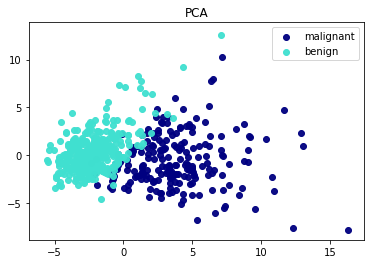

In [228]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(data_s)

colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], cancer.target_names):
    plt.scatter(X_r[target == i, 0], X_r[target == i, 1], color=color, alpha=.95, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')

Os dados agora estão todos muito próximos de 0 com desvio padrão 1, e isso melhora a disposição gráfica como pode ser visto na imagem. Não há mais tanto aglomeração, e existe separações lineares mais visíveis. Isso são fortes indícios de que agora um método de aprendizagem terá melhor desempenho. No entanto, enquanto para visualizar o StandardScaler foi aplicado em toda a base, é importante perceber que ao testar o modelo, **o StandardScaler só pode ter dados de treino no fit**. Ou seja, ele não pode conhecer a disposição dos dados de teste.

In [234]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = 5)

acc = []
for train_index, test_index in kf.split(data, target): # precisa passar as classes agora para que a divisão aconteça
    knn = KNeighborsClassifier(n_neighbors = 7)
    
    scaler = StandardScaler()
    train = scaler.fit_transform(data[train_index]) # somente dados de treino no fit
    test = scaler.transform(data[test_index]) # aplica-se transform no teste apenas
    
    knn.fit(train,target[train_index])
    y_pred = knn.predict(test)
    acc.append(accuracy_score(y_pred,target[test_index]))

acc = np.asarray(acc) # converte pra numpy pra ficar mais simples de usar média e desvio padrão
print('Acurácia - %.2f +- %.2f' % (acc.mean() * 100, acc.std() * 100))

Acurácia - 97.01 +- 0.89


Os resultados melhoraram substancionalmente e são confiáveis, visto que foram avaliados numa estratégia de validação cruzada com 5 partições.

Um último passo é integrar na validação cruzada a pesquisa pelos melhores parâmetros, algo semelhante ao que foi feito anteriormente. Novamente, o Scikit-Learn tem uma função para facilitar o processo chamada *GridSearchCV*. A dificuldade nesse ponto aparece ao perceber como será formado o fluxo, afinal não pode-se procurar os melhores parâmetros a cada execução da validação cruzada, uma vez que a validação cruzada tem o objetivo de avaliar um modelo e a mudança de parâmetro a cada execução criaria um modelo novo. Isso criaria um loop infinito de tentativas de avaliar um modelo.

A solução é separar um conjunto de dados para fazer a busca pelos melhores parâmetros e formar um modelo. Assumindo que esse conjunto utilizado para esse propósito é representativo, avalia-se então com a validação cruzada qual o desempenho desse modelo. 

In [218]:
# utilizando validação cruzada com cross_val_score
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier(n_neighbors = 7))])
scores = cross_val_score(pipeline, data, target, cv=5) # 5 execuções diferentes com 20% dos dados para teste

print('Acurácia - %.2f +- %.2f' % (scores.mean() * 100, scores.std() * 100))

Acurácia - 97.01 +- 0.89


In [220]:
# separa-se uma parcela para encontrar os melhores parâmetros (5% do original)
data_gs, data_cv, target_gs, target_cv = train_test_split(data, target, test_size=0.5, random_state=142, shuffle=True)

# uma forma automática de StandardScaler + CLF
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

# utiliza-se GridSearchCV para achar os melhores parâmetros
from sklearn.model_selection import GridSearchCV
parameters = {'clf__n_neighbors': [1,2,3,4,5], 'clf__weights' : ['uniform','distance']} # quais parâmetros e quais valores serão testados
clf = GridSearchCV(pipeline, parameters, cv=3, iid=False) # clf vai armazenar qual foi a melhor configuração
clf.fit(data_gs, target_gs)

print(clf.best_params_)

# utilizando validação cruzada para avaliar o modelo
scores = cross_val_score(clf.best_estimator_, data_cv, target_cv, cv=8)
print('Acurácia - %.2f +- %.2f' % (scores.mean() * 100, scores.std() * 100))

clf = clf.best_estimator_

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = 9)

acc = []
for train_index, test_index in kf.split(data_cv, target_cv): # precisa passar as classes agora para que a divisão aconteça
    
    #scaler = StandardScaler()
    #train = scaler.fit_transform(data_cv[train_index]) # somente dados de treino no fit
    #test = scaler.transform(data_cv[test_index]) # aplica-se transform no teste apenas
    
    clf.fit(data_cv[train_index],target_cv[train_index])
    y_pred = clf.predict(data_cv[test_index])
    acc.append(accuracy_score(y_pred,target_cv[test_index]))

acc = np.array(acc)
print('Acurácia - %.2f +- %.2f' % (acc.mean() * 100, acc.std() * 100))

{'clf__n_neighbors': 5, 'clf__weights': 'uniform'}
Acurácia - 95.76 +- 3.16
Acurácia - 95.42 +- 3.67


O resultado melhorou ainda mais ao pesquisar qual era a melhor configuração de atributos, antes de avaliar a performance do modelo no conjunto de teste. O conceito e a função de Pipeline serão abordados com mais detalhes nos próximos encontros, então não se desespere.

Conclui-se aqui essa breve discussão e apresentação sobre divisão de dados, onde você pode ter aprendido sobre:
* separação dos dados em treino, validação e teste;
* normalização dos dados;
* validação cruzada; e
* busca pelos melhores parâmetros.

# Exercício

* Com o conjunto de dados sobre *câncer de mama*, **tente obter o melhor desempenho de acurácia**. 

* Organize e **tenha cuidado** para que seu experimento execute um *protocolo de validação que faça sentido*.

Mais informações sobre esse conjunto de dados poderão ser obtidas em: 
[https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset](https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset)

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()
data = breast_cancer.data
target = breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, shuffle=True, random_state=142)


In [223]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [3, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'algorithm': ['ball_tree', 'kd_tree']
    #'leaf_size' : [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

knn = KNeighborsClassifier(n_neighbors=3)

gs = GridSearchCV(knn, grid_params, cv=5, n_jobs=1)

gs_results = gs.fit(X_train, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

0.9231527093596059
KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')
{'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [238]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names = {'classe1','classe2'}))


precision    recall  f1-score   support

     classe1       0.92      0.92      0.92       107
     classe2       0.95      0.95      0.95       178

    accuracy                           0.94       285
   macro avg       0.93      0.93      0.93       285
weighted avg       0.94      0.94      0.94       285

